In [361]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# show all columns when displaying a data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preeprocessing

In [362]:
dtypes = {'country':'category', 'cat_name':'category', 'cat_slug':'category', 'loc_name':'category', 
'loc_country':'category', 'loc_state':'category', 'loc_type':'category', 'main_category':'category', 
'sub_category':'category', 'goal_categorical':'category', 'currency':'category', 'usd_type':'category'}
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0, parse_dates=['created_at', 'launched_at', 'deadline', 'state_changed_at'], dtype=dtypes)

In [363]:
columns = frame_all.columns

In [364]:
columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'name', 'pledged', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'dur_inactive',
       'dur_until_state_changed', 'dur_active', 'dur_ratio', 'cat_name',
       'cat_slug', 'loc_name', 'loc_country', 'loc_state', 'loc_type',
       'photo_thumb', 'photo_large', 'project_address', 'profile_photo',
       'creator_name', 'creator_id', 'creator_thumb', 'creator_address',
       'main_category', 'sub_category', 'goal_surpass', 'goal_surpass_share',
       'goal_surpass_usd', 'goal_usd', 'goal_categorical', 'blurb_words',
       'blurb_len', 'name_len', 'name_words', 'state_bool', 'baseline'],
      dtype='object')

In [365]:
to_delete = ['backers_count',
 'blurb',
 'created_at',
 'converted_pledged_amount',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'goal',
 'id',
 'is_starrable',
 'launched_at',
 'name',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'usd_pledged',
 'cat_name',
 'cat_slug',
 'loc_name',
 'loc_country',
 'loc_state',
 'photo_thumb',
 'photo_large',
 'project_address',
 'profile_photo',
 'creator_name',
 'creator_id',
 'creator_thumb',
 'creator_address',
 'goal_surpass',
 'goal_surpass_share',
 'goal_surpass_usd',
 'baseline',
 'disable_communication',
 'goal_usd',
 'dur_until_state_changed',
 'dur_ratio',
 'fx_rate',
 'static_usd_rate',
 'blurb_words',
 'name_words'
 ]

# Additionally deleted: 
# Cannot be known a priori: 'dur_until_state_changed', 'dur_ratio'
# Somehow a duplicate: 'goal_usd', 'blurb_words', 'name_words'
# For other reasons: 'fx_rate', 'static_usd_rate'

In [366]:
frame_all.drop(columns=to_delete, inplace=True)

In [367]:
# Save category-column-names in list
categorical_cols = frame_all.select_dtypes(include='category').columns

#import pandas as pd
frame_all = pd.get_dummies(frame_all, columns = categorical_cols, drop_first=True)

In [368]:
X = frame_all.drop('state_bool', axis=1)
y = frame_all.state_bool

In [369]:
RSEED=42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)

# Random Forest Model 1

In [370]:
# Features for feature importances
features = list(X_train.columns)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)


n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished


Average number of nodes 61897
Average maximum depth 104


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [371]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

# Function for calculating the evaluation metrics and plotting the ROC-curve
# TODO: CHANGE BASELINE MODEL TO OURS?

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 10
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();


In [372]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


Recall Baseline: 1.0 Test: 0.79 Train: 1.0
Precision Baseline: 0.56 Test: 0.8 Train: 1.0
Roc Baseline: 0.5 Test: 0.86 Train: 1.0


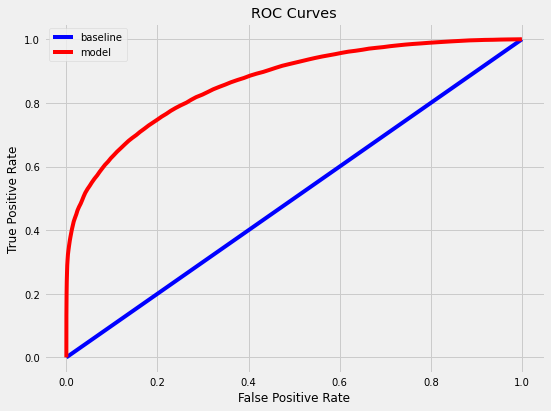

In [373]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
# plt.savefig('image/nb1_roc_auc_curve.png')

Confusion matrix, without normalization
[[13877  4655]
 [ 4906 18732]]
Confusion matrix, without normalization
[[55594     0]
 [    2 70911]]


/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)
/var/folders/_2/0mbl5gkd02l3mjd7fnqkpl1c0000gn/T/ipykernel_35682/2516166632.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


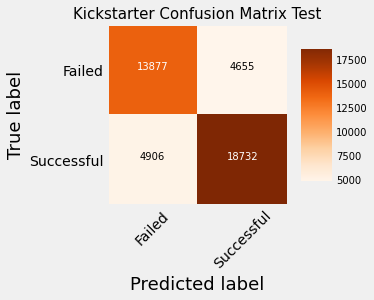

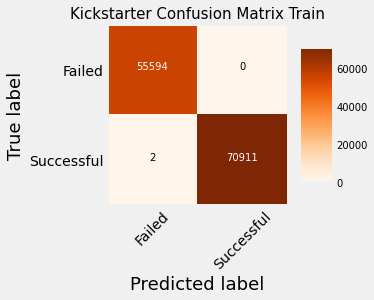

In [374]:
# Execute confusion matrices

# Confusion matrix TEST
cm_test = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm_test, classes = ['Failed','Successful'],
                      title = 'Kickstarter Confusion Matrix Test')

# Confusion matrix TRAIN
cm_train = confusion_matrix(y_train, train_rf_predictions)
plot_confusion_matrix(cm_train, classes = ['Failed','Successful'],
                      title = 'Kickstarter Confusion Matrix Train')

# plt.savefig('image/nb1_cm.png')

In [375]:
# Execute classification matrices

cr_test = classification_report(y_test, rf_predictions)
print('Classification on test data')
print(cr_test)

cr_train = classification_report(y_train, train_rf_predictions)
print('Classification on train data')
print(cr_train)

Classification on test data
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     18532
           1       0.80      0.79      0.80     23638

    accuracy                           0.77     42170
   macro avg       0.77      0.77      0.77     42170
weighted avg       0.77      0.77      0.77     42170

Classification on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55594
           1       1.00      1.00      1.00     70913

    accuracy                           1.00    126507
   macro avg       1.00      1.00      1.00    126507
weighted avg       1.00      1.00      1.00    126507



In [376]:
# Check feature importances

fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
print(fi_model)

                             feature  importance
0                       dur_inactive    0.162345
3                           name_len    0.115412
1                         dur_active    0.108656
2                          blurb_len    0.107478
38            usd_type_international    0.018996
52                main_category_food    0.014948
205        goal_categorical_1_to_500    0.014499
210       goal_categorical_500_to_5k    0.013435
58          main_category_technology    0.011547
94          sub_category_documentary    0.010911
176              sub_category_shorts    0.009856
193         sub_category_video games    0.009136
138        sub_category_mobile games    0.008353
196                 sub_category_web    0.008313
144          sub_category_nonfiction    0.008247
121        sub_category_illustration    0.008092
44                     loc_type_Town    0.008083
123          sub_category_indie rock    0.007799
108             sub_category_fiction    0.007687
212       goal_categ